<a href="https://www.kaggle.com/code/andrewbaum/diamond-price-regression?scriptVersionId=119480184" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


# Loading and Inspecting the Data

In [2]:
data = pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53943, 11)

In [5]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

The data is already clean and has no missing values. :)

In [8]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Exploration of Categorical Variables

In [9]:
data['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
data['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
data['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

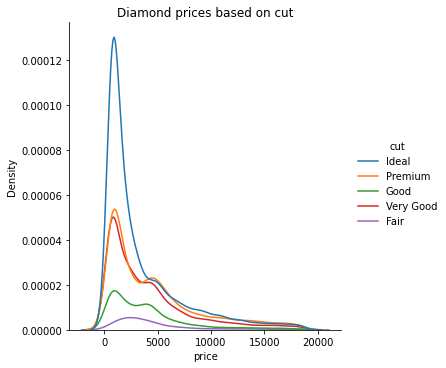

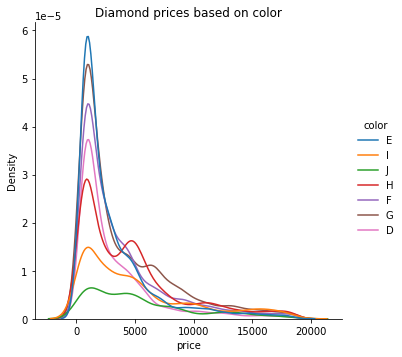

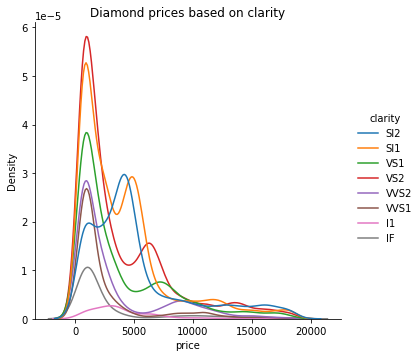

In [12]:
for c in ['cut', 'color', 'clarity']:
    sns.displot(data=data, x="price", hue=f"{c}", kind='kde')
    plt.title(f'Diamond prices based on {c.title().lower()}')
    plt.show()

# Data Cleaning

In [13]:
#Drop extra label column
data = data.drop(['Unnamed: 0'], axis=1)

In [14]:
#divide the variables into numeric and categorical
data_cat = ['cut', 'color', 'clarity']
data_num = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Data Exploration

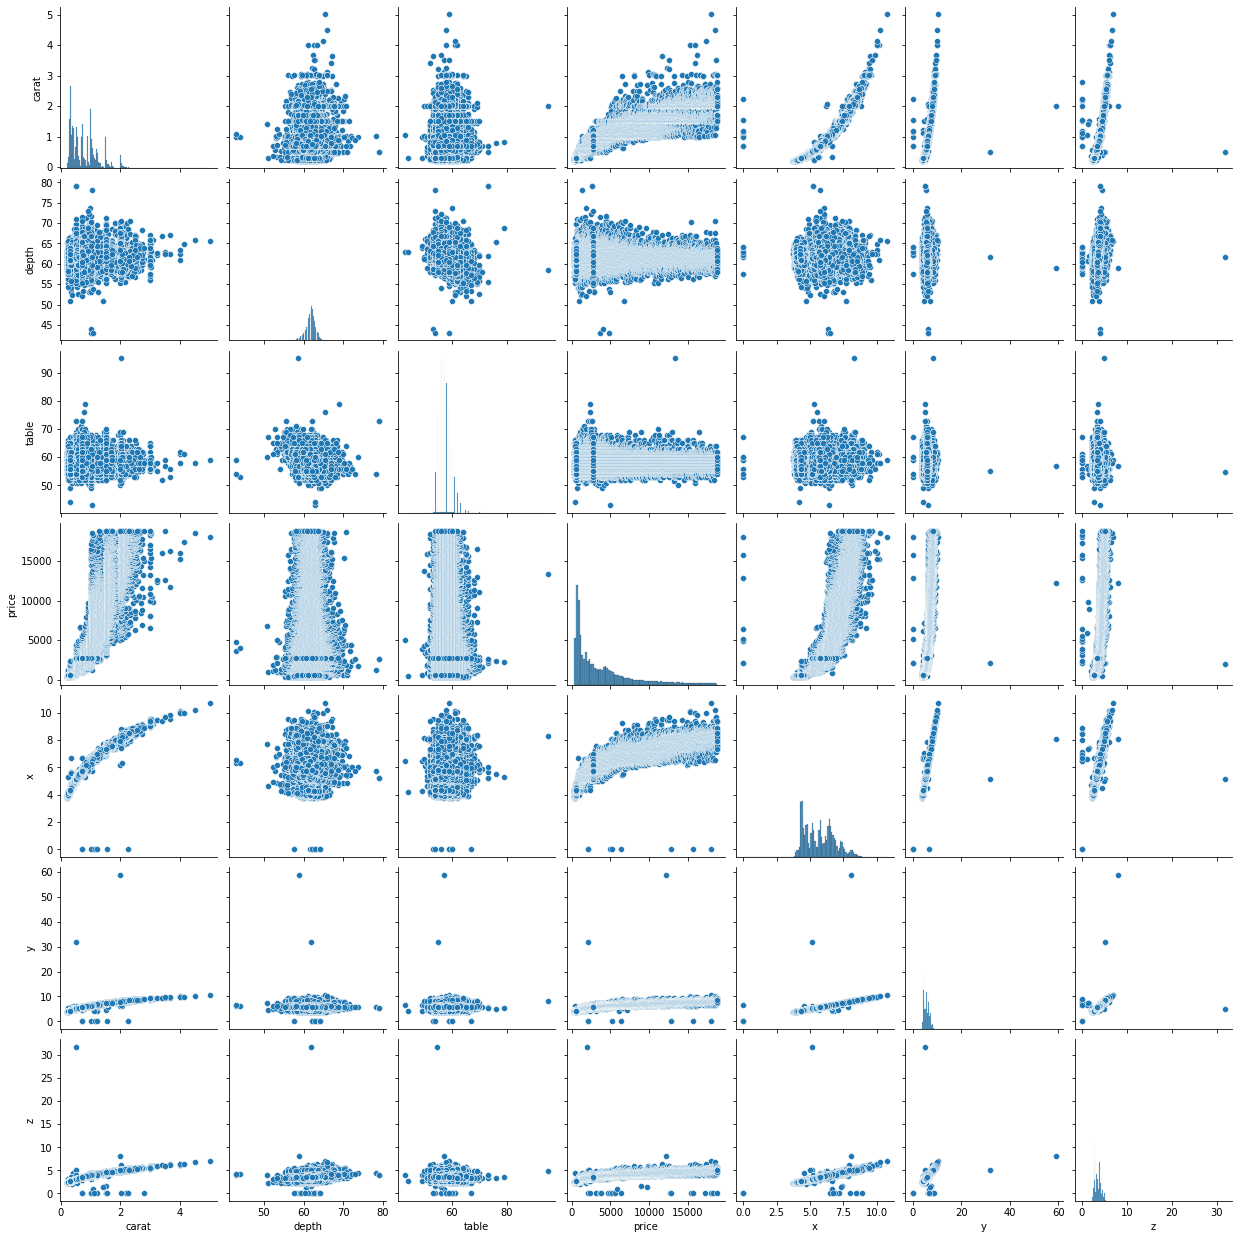

In [15]:
sns.pairplot(data)

In [16]:
corr=data.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


<AxesSubplot:>

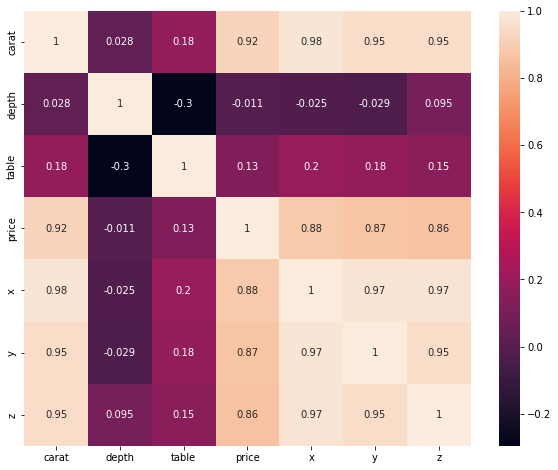

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

* There's a rather high correlation between carat and price, as well as the dimensions (x/y/z) and price

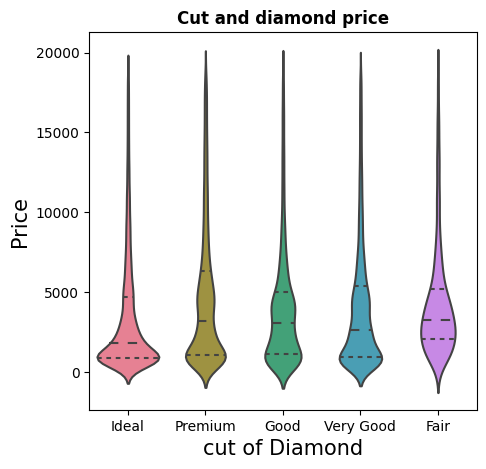

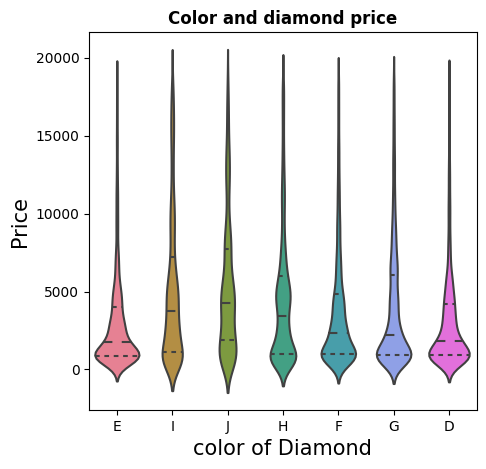

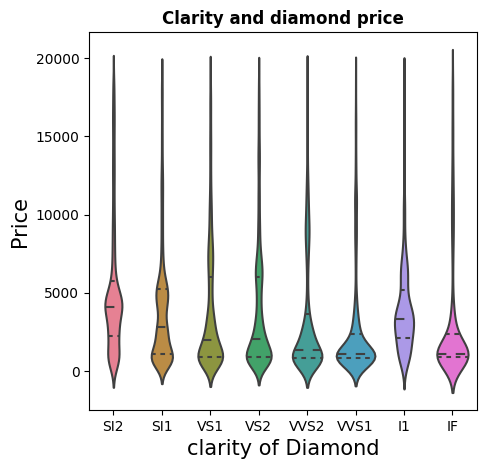

In [18]:
for c in data_cat:

    plt.figure(figsize = [5,5], dpi = 100)
    sns.violinplot(x=f'{c}', y = "price", data = data, palette = "husl", inner = "quartile")

    plt.title(f'{c.title()} and diamond price', fontdict = {"fontweight":"bold"})
    plt.xlabel(f'{c.title().lower()} of Diamond', fontdict = {"fontsize": 15})
    plt.ylabel("Price", fontdict = {"fontsize": 15})

    plt.show()

In general, diamonds have a wide price range which is dependent on multiple features. The features x, y, z, and carat have the highest correlation with price.


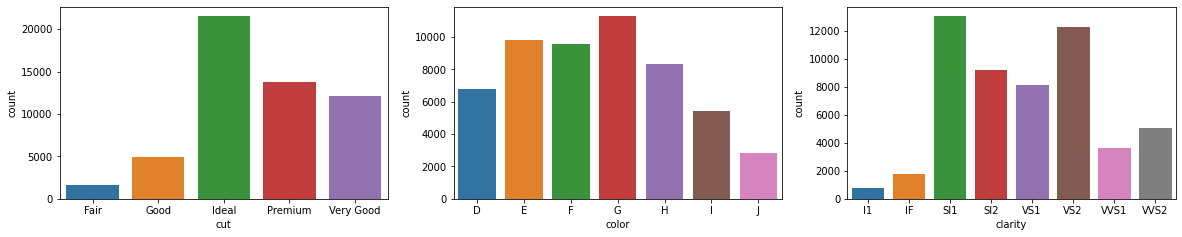

In [19]:
i = 1
plt.figure(figsize=(20, 12))
for c in data_cat:
    plt.subplot(3, 3, i)
    sns.countplot(x=data[c].sort_values())
    i+=1

The data is relatively well distributed, especially among color. There are less data points for diamonds of "fair" and "good" cuts and l1 and lF clarities. 

# Modeling

In [20]:
#encode the categorical variables
labelencoder=LabelEncoder()
data['cut'] = labelencoder.fit_transform(data['cut'])
data['color'] = labelencoder.fit_transform(data['color'])
data['clarity'] = labelencoder.fit_transform(data['clarity'])

In [21]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [22]:
#price is what we want to predict
X = data.drop(['price'],axis=1)
y=data['price']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [24]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
19019,1.01,4,2,7,60.7,59.0,6.40,6.46,3.90
2915,1.04,1,6,5,58.2,64.0,6.64,6.53,3.85
4960,0.90,1,5,1,63.7,64.0,6.02,6.07,3.85
28866,0.37,4,4,2,63.2,57.0,4.58,4.54,2.88
42548,0.59,4,1,3,60.5,58.0,5.43,5.51,3.31


In [25]:
#scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_test_scaled.shape

(13486, 9)

In [27]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [28]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.8885709791962022
MAE : 856.9863449293025
RMSE: 1324.3510143186181


In [29]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.9616728408416971
MAE : 366.6305798605962
RMSE: 776.707084619954


In [30]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8876327100256352
MAE : 867.9378064887129
RMSE: 1329.9150626390463


In [31]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.8674907725979558
MAE : 953.2177168638043
RMSE: 1444.1989082515745


In [32]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.8840389767092333
MAE : 899.7354125834628
RMSE: 1351.0143780694425


In [33]:
model_6 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_6)

R^2 :  0.9797184480873476
MAE : 273.89631851365857
RMSE: 565.0079298728072


RandomForest preformed better than all the other models, so a grid search will be preformed to find the optimal parameters. 

# Hyperparameter Optimization

In [34]:
rfc=RandomForestRegressor(random_state=1)

In [35]:
#define hyperparemeters to optimize
#criterion makes the calculation too long so it's left out
param_grid = { 
    'n_estimators': [500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 15, 20],
    #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}

In [36]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 5000]})

In [37]:
#print the best parameters determined in GridSearchCV
CV_rfc.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000}

In [38]:
#run a final model using the optimal parameters
final_model = RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=15, min_samples_leaf=3, random_state=1)
run_experiment(final_model)

R^2 :  0.9798067705759802
MAE : 274.5954508399422
RMSE: 563.7763339172511


Interestingly the R^2 value  is the same as the suboptimal model, and the MAE actually is worse in the final model. The RMSE is slightly better however. 